In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [3]:
df[['sex','score']].value_counts().sort_index()

sex  score
1    3        1
     5        1
     6        1
2    2        1
     4        1
3    4        1
dtype: int64

In [4]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [5]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [6]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [7]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [8]:
df.dropna(subset = ['sex','score']) \
    .groupby('sex') \
    .agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [9]:
df = pd.DataFrame({'x1' : [1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1, 'a' , np.nan)

In [10]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [11]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [12]:
df['x2'] = np.where(df['x1'] == 1, 'a','etc')

In [14]:
df['x2'] = df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [15]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


<Axes: ylabel='hwy'>

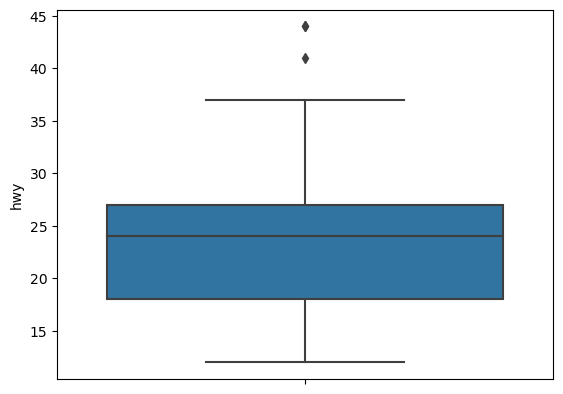

In [16]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg , y= 'hwy')

In [17]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [21]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [22]:
iqr = pct75 - pct25
iqr

9.0

In [23]:
pct25 - 1.5*iqr

4.5

In [25]:
pct75 + 1.5*iqr

40.5

In [26]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5) , np.nan , mpg['hwy'])
# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [28]:
mpg.dropna(subset = ['hwy']) \
    .groupby('drv')\
    .agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [29]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13 , 57, 92],'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28,42,128,202],'cty'] = [3, 4, 39, 42]

In [39]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

In [36]:
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']), mpg['drv'] , np.nan)
mpg['drv'].value_counts().sort_index()

In [38]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

<Axes: ylabel='cty'>

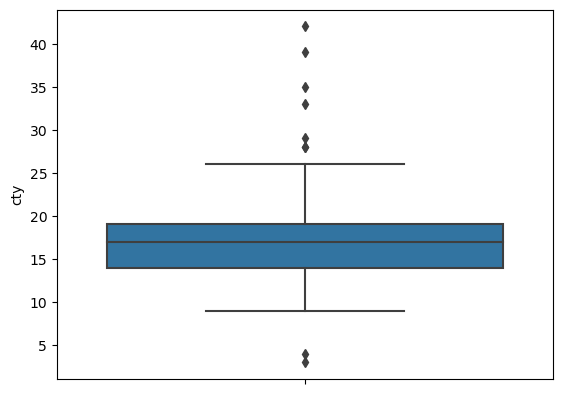

In [40]:
sns.boxplot(data = mpg , y= 'cty')

In [45]:
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [46]:
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [44]:
iqr = pct75 - pct25
iqr

5.0

In [47]:
pct25 - iqr * 1.5

6.5

In [48]:
pct75 + iqr * 1.5

26.5

In [49]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5) , np.nan , mpg['cty'])

<Axes: ylabel='cty'>

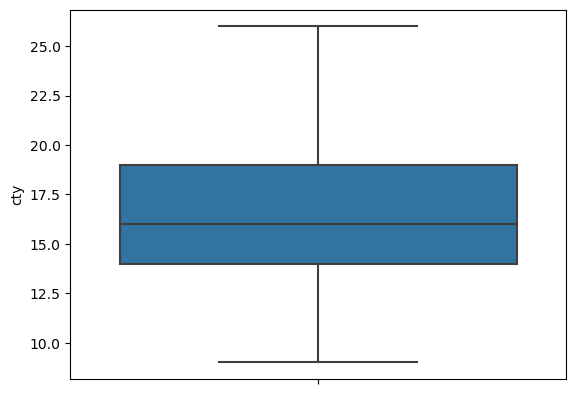

In [50]:
sns.boxplot(data = mpg , y= 'cty')

In [54]:
mpg.dropna(subset = ['drv','cty']) \
    .groupby('drv') \
    .agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
